### Emotion Classification Using Machine Learning

**Abstact**

Emotion classification is a crucial task in Natural Language Processing (NLP), where textual data is analyzed to categorize emotions. This project aims to classify user comments into different emotional categories using machine learning models. The dataset consists of textual comments labeled with emotions, which are preprocessed using tokenization, stemming, and stopword removal. The processed text is then transformed into numerical representations using TF-IDF vectorization. Multiple classification models, including Logistic Regression, Support Vector Machine (SVM), Random Forest, and Naïve Bayes, are trained and evaluated based on accuracy and classification reports.

**Objective**

1) To preprocess textual data by removing stopwords, tokenizing, and stemming words for better representation.
2) To apply TF-IDF vectorization to convert text into numerical features for model training.
3) To train multiple classification models (Logistic Regression, SVM, Random Forest, and Naïve Bayes) and compare their performance.
4) To visualize the data distribution, word importance, and model performance using advanced visualization techniques.
5) To implement a real-time emotion prediction system that classifies new text input into emotional categories.


**ML model used**

Logistic regression, Support vector machine(SVM), Random forest classifier, Naive Bayer(NB)

**Visualisation tool**

Pie chart, Word cloud, Bar plot, Confusion matrix

In [18]:

import nltk
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [19]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LexusYj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LexusYj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
df = pd.read_csv('Emotion_classify_Data.csv')
df.info()
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5937 entries, 0 to 5936
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Comment  5937 non-null   object
 1   Emotion  5937 non-null   object
dtypes: object(2)
memory usage: 92.9+ KB
                                             Comment Emotion
0  i seriously hate one subject to death but now ...    fear
1                 im so full of life i feel appalled   anger
2  i sit here to write i start to dig out my feel...    fear
3  ive been really angry with r and i feel like a...     joy
4  i feel suspicious if there is no one outside l...    fear


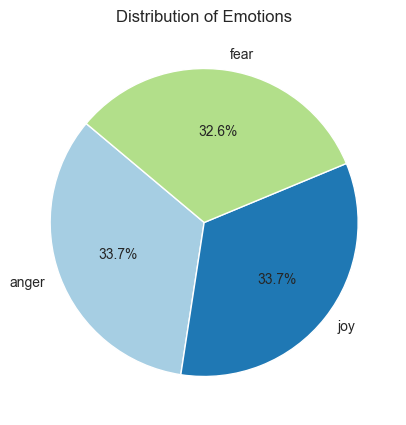

In [23]:
emotion_counts = df['Emotion'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(emotion_counts, labels=emotion_counts.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors, startangle=140)
plt.title("Distribution of Emotions")
plt.show()

In [24]:
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    stemmer = PorterStemmer()

    tokens = word_tokenize(text.lower())  # Tokenization & Lowercasing
    filtered_tokens = [stemmer.stem(word) for word in tokens if word.isalnum() and word not in stop_words]

    return ' '.join(filtered_tokens)

In [25]:
# Fill missing values
df['Comment'] = df['Comment'].fillna('')

In [26]:
# Apply preprocessing
df['preprocessed_comment'] = df['Comment'].apply(preprocess_text)
print(df[['Comment', 'preprocessed_comment']].head())

                                             Comment  \
0  i seriously hate one subject to death but now ...   
1                 im so full of life i feel appalled   
2  i sit here to write i start to dig out my feel...   
3  ive been really angry with r and i feel like a...   
4  i feel suspicious if there is no one outside l...   

                                preprocessed_comment  
0    serious hate one subject death feel reluct drop  
1                            im full life feel appal  
2  sit write start dig feel think afraid accept p...  
3  ive realli angri r feel like idiot trust first...  
4  feel suspici one outsid like raptur happen someth  


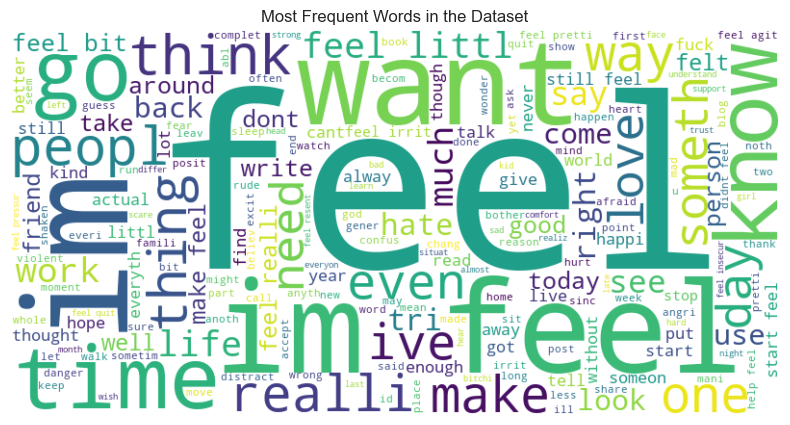

In [28]:
all_words = ' '.join(df['preprocessed_comment'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Frequent Words in the Dataset")
plt.show()


In [29]:
encoder = LabelEncoder()
df['emotion_no'] = encoder.fit_transform(df['Emotion'])

In [30]:
# Split Data
X = df['preprocessed_comment']
y = df['emotion_no']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF Vectorisation
vectorizer = TfidfVectorizer()
X_train_cv = vectorizer.fit_transform(X_train)
X_test_cv = vectorizer.transform(X_test)

In [31]:
models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': MultinomialNB()
}

# Train & Evaluate Models
results = []
predictions = {}

for model_name, model in models.items():
    model.fit(X_train_cv, y_train)
    y_pred = model.predict(X_test_cv)

    # Store predictions
    predictions[model_name] = y_pred

    # Compute accuracy
    acc = accuracy_score(y_test, y_pred)
    results.append({'Model': model_name, 'Accuracy': acc})

    # Print classification report
    print(f"\nClassification Report for {model_name}:\n")
    print(classification_report(y_test, y_pred))


Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       392
           1       0.94      0.90      0.92       416
           2       0.92      0.95      0.93       380

    accuracy                           0.93      1188
   macro avg       0.93      0.93      0.93      1188
weighted avg       0.93      0.93      0.93      1188


Classification Report for SVM:

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       392
           1       0.95      0.89      0.92       416
           2       0.90      0.94      0.92       380

    accuracy                           0.92      1188
   macro avg       0.92      0.92      0.92      1188
weighted avg       0.92      0.92      0.92      1188


Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       0.91      0.96      0.94       392
    

In [32]:
results_df = pd.DataFrame(results)
print(results_df)

                 Model  Accuracy
0  Logistic Regression  0.925926
1                  SVM  0.917508
2        Random Forest  0.940236
3          Naive Bayes  0.901515


C:\Users\LexusYj\AppData\Local\Temp\ipykernel_30860\201532484.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df['Model'], y=results_df['Accuracy'], palette='coolwarm')


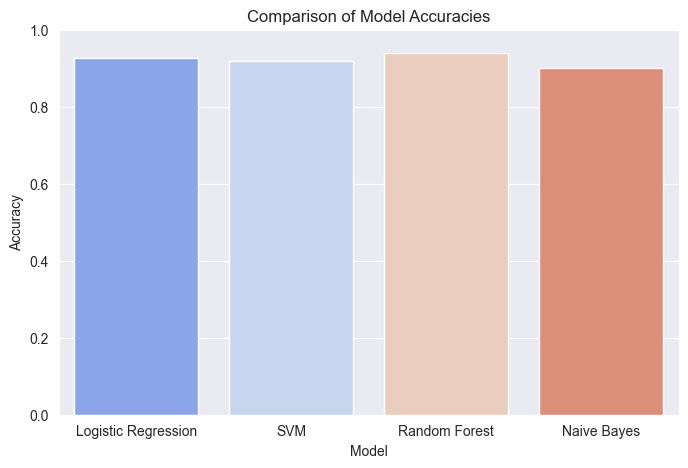

In [33]:
plt.figure(figsize=(8, 5))
sns.barplot(x=results_df['Model'], y=results_df['Accuracy'], palette='coolwarm')
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Comparison of Model Accuracies")
plt.ylim(0, 1)
plt.show()

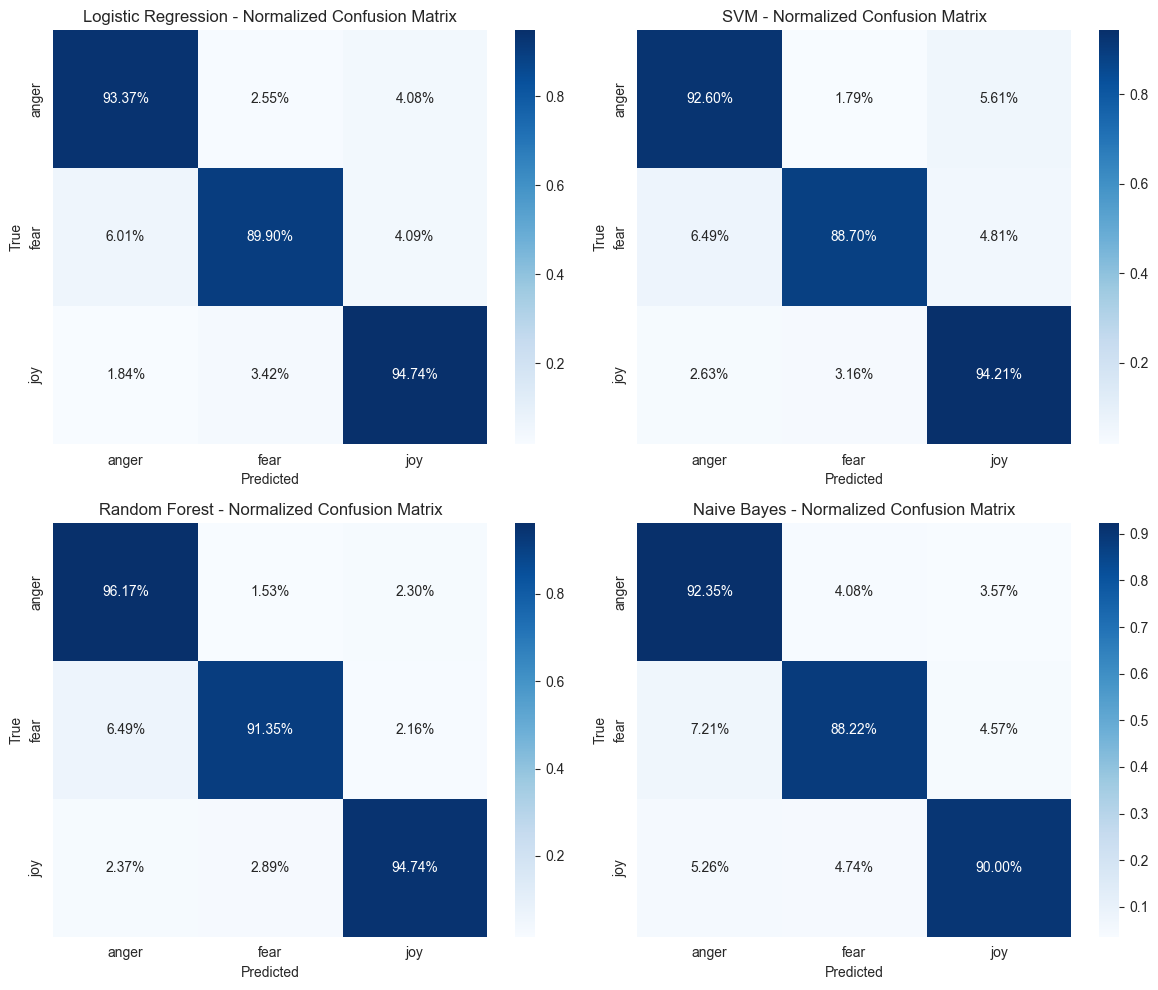

In [42]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for ax, (model_name, y_pred) in zip(axes.flatten(), predictions.items()):
    cm = confusion_matrix(y_test, y_pred, normalize='true')  # Normalize
    sns.heatmap(cm, annot=True, fmt='.2%', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_, ax=ax)
    ax.set_title(f"{model_name} - Normalized Confusion Matrix")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("True")

plt.tight_layout()
plt.show()


In [43]:
# Testing on New Input
test_text = "I'm feeling excited!"
test_text_processed = [preprocess_text(test_text)]
test_text_vectorized = vectorizer.transform(test_text_processed)

# Predict with all models
for model_name, model in models.items():
    test_pred = model.predict(test_text_vectorized)
    predicted_label = encoder.inverse_transform(test_pred)[0]
    print(f"{model_name} Prediction: {predicted_label}")

Logistic Regression Prediction: joy
SVM Prediction: joy
Random Forest Prediction: joy
Naive Bayes Prediction: joy
